IMPORTING NECESSARY LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

LOADING THE DATASET

In [6]:
# Load dataset
file_path = "customer_data.csv" 
df = pd.read_csv(file_path)

INSPECTING THE DATASET

In [7]:
print("Shape of dataset:", df.shape)

Shape of dataset: (100, 8)


In [8]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Customer ID                0
Age                        5
Annual Income              0
Spending Score             0
Gender                     5
Membership Type            0
Last Purchase Amount       0
Customer Feedback Score    0
dtype: int64


In [9]:
print("\nDuplicate entries:", df.duplicated().sum())


Duplicate entries: 0


In [10]:
print("\nData types:\n", df.dtypes)


Data types:
 Customer ID                  int64
Age                        float64
Annual Income               object
Spending Score               int64
Gender                      object
Membership Type             object
Last Purchase Amount        object
Customer Feedback Score      int64
dtype: object


In [11]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
        Customer ID        Age  Spending Score  Customer Feedback Score
count   100.000000  95.000000      100.000000               100.000000
mean     50.500000  43.642105       46.120000                 4.970000
std      29.011492  15.062223       32.160042                 2.512414
min       1.000000  19.000000       -1.000000                 1.000000
25%      25.750000  32.000000       19.000000                 3.000000
50%      50.500000  42.000000       48.000000                 5.000000
75%      75.250000  57.000000       71.500000                 7.000000
max     100.000000  69.000000       99.000000                 9.000000


DATA PREPROCESSING

In [38]:
# Convert categorical values
df["Gender"] = df["Gender"].astype("category").cat.codes  # Encode Gender
df["Membership Type"] = df["Membership Type"].astype("category").cat.codes  # Encode Membership

# Convert erroneous values
df["Annual Income"] = pd.to_numeric(df["Annual Income"], errors="coerce")
df["Last Purchase Amount"] = pd.to_numeric(df["Last Purchase Amount"], errors="coerce")

# Drop rows with remaining invalid values
df = df.dropna()

# Select numerical columns for clustering
features = ["Age", "Annual Income", "Spending Score", "Last Purchase Amount", "Customer Feedback Score"]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

print(df)

    Customer ID   Age  Annual Income  Spending Score  Gender  Membership Type  \
0             1  56.0        81228.0              59       1                1   
1             2  69.0        68984.0              32       2                1   
2             3  46.0        60774.0              96       1                0   
3             4  32.0        22568.0              88       2                0   
4             5  60.0        82592.0              52       1                3   
..          ...   ...            ...             ...     ...              ...   
92           93  64.0        25530.0              80       2                0   
93           94  41.0       114856.0               3       2                2   
95           96  42.0       117504.0              24       0                3   
97           98  58.0        33545.0              33       1                0   
99          100  32.0        54766.0              75       0                1   

    Last Purchase Amount  C

Elbow Method to find optimal clusters

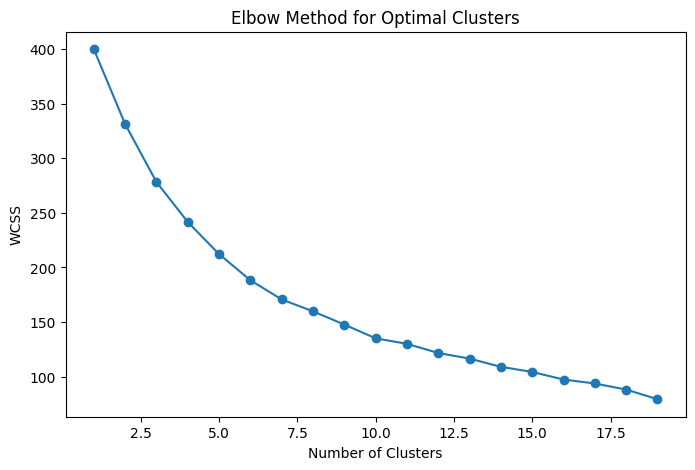

In [39]:
wcss = []
K = range(1, 20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Ploting Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

K-MEANS CLUSTERING

In [40]:
# Choose the optimal number of clusters (e.g., from elbow method)
optimal_clusters = 20 # Update this based on the elbow plot

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Silhouette Score
sil_score = silhouette_score(df_scaled, df["Cluster"])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.237088511084524


Visualization

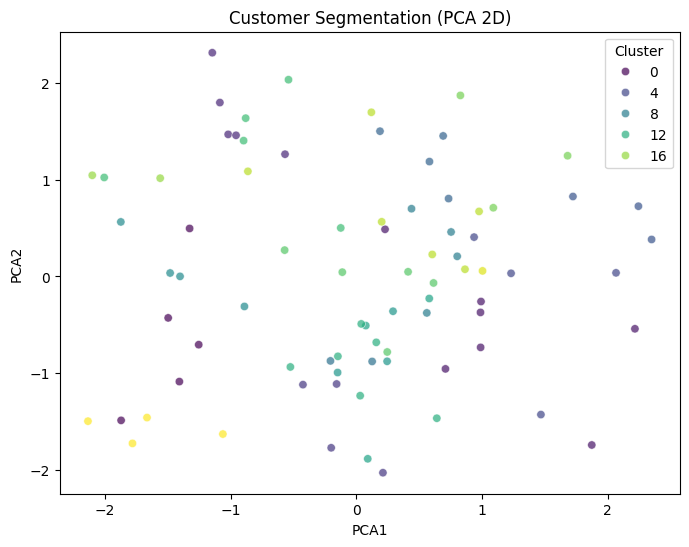

In [41]:
# PCA for 2D visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df["PCA1"], df["PCA2"] = df_pca[:, 0], df_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="viridis", alpha=0.7)
plt.title("Customer Segmentation (PCA 2D)")
plt.show()

SAVING THE CLUSTERED DATA

In [42]:
df.to_csv("customer_data_clustered.csv", index=False)
print("Clustered dataset saved as 'customer_data_clustered.csv'")

Clustered dataset saved as 'customer_data_clustered.csv'
